# BPM analysis scratchpad

Test filtering and detection techniques that can be implemented in the microcontroller.

Make sure you read the README.md file

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
from scipy import signal
import numpy as np
import recorder

In [2]:
%load_ext autoreload
%autoreload 2

In [19]:
# Record 2000 samples worth of data, delaying acquisition by 5 seconds
# this can be done also using the command line interface of recorder.py
recorder.run(port='/dev/ttyACM0', outfile='test.out', holdoff=5, debug=False, samples=2000)

INFO:recorder:Starting streamer thread, delaying acquisition by 5.00s
INFO:recorder:Gathered 0 samples
INFO:recorder:Gathered 0 samples
INFO:recorder:Gathered 0 samples
INFO:recorder:Gathered 0 samples
INFO:recorder:Gathered 0 samples
INFO:recorder:Started acquisition
INFO:recorder:Gathered 0 samples
INFO:recorder:Gathered 98 samples
INFO:recorder:Gathered 196 samples
INFO:recorder:Gathered 294 samples
INFO:recorder:Gathered 392 samples
INFO:recorder:Gathered 490 samples
INFO:recorder:Gathered 587 samples
INFO:recorder:Gathered 685 samples
INFO:recorder:Gathered 783 samples
INFO:recorder:Gathered 881 samples
INFO:recorder:Gathered 979 samples
INFO:recorder:Gathered 1077 samples
INFO:recorder:Gathered 1175 samples
INFO:recorder:Gathered 1272 samples
INFO:recorder:Gathered 1370 samples
INFO:recorder:Gathered 1468 samples
INFO:recorder:Gathered 1566 samples
INFO:recorder:Gathered 1664 samples
INFO:recorder:Gathered 1762 samples
INFO:recorder:Gathered 1860 samples
INFO:recorder:Gathered 19

In [20]:
# Read from the recorded session
df = pd.read_csv('test.out', delimiter='\t', index_col=0)

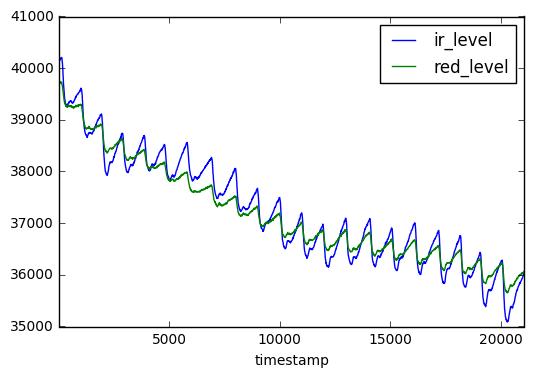

In [21]:
# Plot the sampled data, skipping the first samples
df[4:].plot()

In [22]:
# Copied from http://scipy.github.io/old-wiki/pages/Cookbook/ButterworthBandpass
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

In [23]:
# Sample rate and desired cutoff frequencies (in Hz)
# lowcut = 0.7*60 = 42bpm
# highcut = 3*60 = 180bpm
fs = 100.0
lowcut = 0.7
highcut = 3

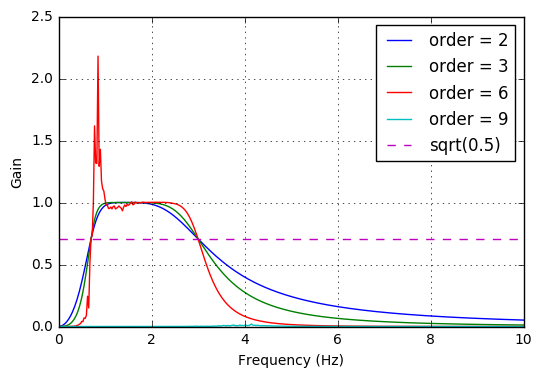

In [24]:
# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
plt.xlim(xmax=10)
for order in [2, 3, 6, 9]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = signal.freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

In [25]:
# Apply the filter to the dataframe
order = 2
df_filtered = df.apply(lambda x: butter_bandpass_filter(x, lowcut, highcut, fs, order=order))

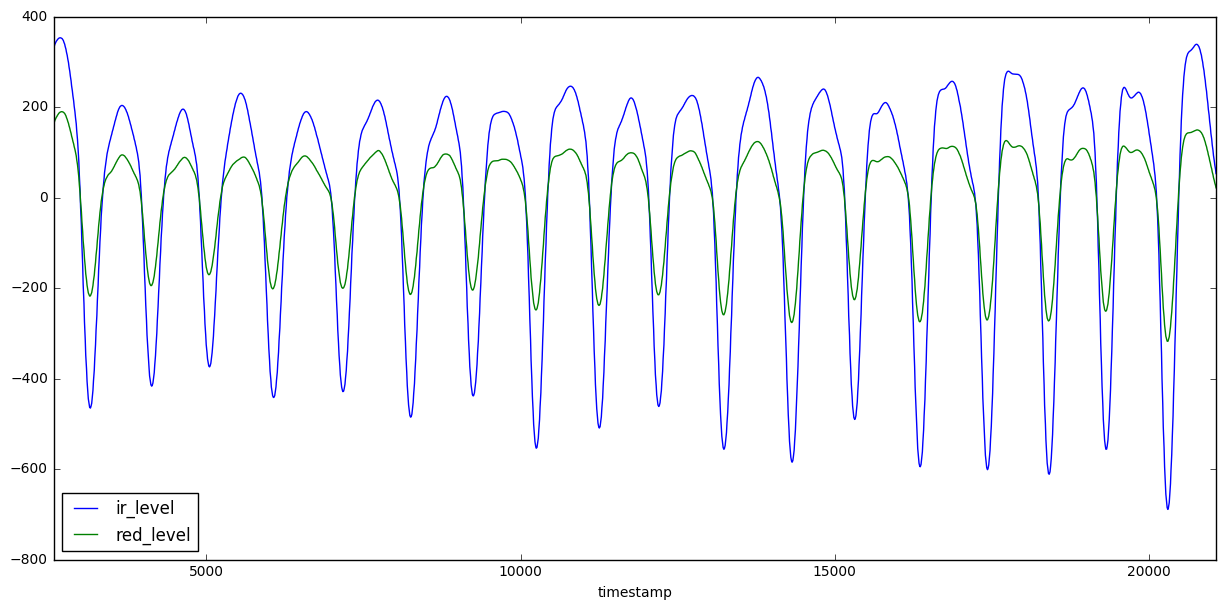

In [26]:
# Plot the filtered dataframe, skipping the initial transition
df_filtered[250:].plot(figsize=(15,7))